<div class="alert alert-block alert-danger">

#### Student Name: Anon Pipatpakin
#### Student ID: 33366829
# Ridge Regression
    

</div>

<div class="alert alert-block alert-info">
    
## Libaries and train test split

</div>

In [1]:
# use train test split from the class
def train_test_split(x, y, train_size=0.6, random_state=None):
    RNG = np.random.default_rng(random_state)
    N = len(x)
    N_train = round(N*train_size)
    idx_train = RNG.choice(N, N_train, replace=False)
    idx_test = np.setdiff1d(np.arange(N), idx_train)
    RNG.shuffle(idx_test)
    return x[idx_train], x[idx_test], y[idx_train], y[idx_test]

In [2]:
# Import libaries
from sklearn.base import BaseEstimator
from scipy.spatial import KDTree
import numpy as np
from sklearn.datasets import load_diabetes, fetch_california_housing
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

<div class="alert alert-block alert-info">
    
## Table of Contents

</div>

[1. Qestion 6](#Question6) <br>

<div class="alert alert-block alert-success">
    
## Question 6  <a class="anchor" name="Question6"></a>

**I.** Derive the weight update steps of stochastic gradient descent (SGD) for linear regression
with L2 regularisation norm or a system of linear equations that uniquely determine the
minimum of the regularised error function. Give this derivation with enough explanation in a
markdown cell (ideally using Latex for readable math typesetting). The starting point is the
definition of the regularised error function and the end result is either the weight update step
for this function in (stochastic) gradient descent or a system of linear equations described in
matrix/vector notation. In both cases, you have to derive the gradient as an intermediate
step.
Hint: Recall that for linear regression we defined the error function E. For this assignment,
you only need to add an L2 regularization term to the error function (error term plus the
regularization term). This question is similar to Activity 2.1 of Module 2.

**Answer**

The definition of regularised error function 
$$
E(w) = RSS + L_2\text{ penalty}
$$
In matrix form 
\begin{equation}
E(\boldsymbol{w})  = \frac{1}{2N}(\boldsymbol{t}- \Phi(\boldsymbol{X})\boldsymbol{w})^T(\boldsymbol{t}- \Phi(\boldsymbol{X})\boldsymbol{w}) + \lambda\boldsymbol{w}^T\boldsymbol{w}\\
E(\boldsymbol{w}) = \frac{1}{2N}(\boldsymbol{t}^T- \boldsymbol{w}^T\Phi(\boldsymbol{X})^T)(\boldsymbol{t}- \Phi(\boldsymbol{X})\boldsymbol{w}) + \lambda\boldsymbol{w}^T\boldsymbol{w}\\
E(\boldsymbol{w}) = \frac{1}{2N}(\boldsymbol{t}^T\boldsymbol{t} - \boldsymbol{w}^T\Phi(\boldsymbol{X})^T\boldsymbol{t} - \boldsymbol{t}^T\Phi(\boldsymbol{X})\boldsymbol{w} + \boldsymbol{w}^T\Phi(\boldsymbol{X})^T\Phi(\boldsymbol{X})\boldsymbol{w}) + \lambda \boldsymbol{w}^T\boldsymbol{w}\\
\end{equation}

From transpose rules
$$\boldsymbol{w}^T\Phi(\boldsymbol{X})^T\boldsymbol{t} = (\boldsymbol{t}^T\Phi(\boldsymbol{X})\boldsymbol{w})^T$$

And the final form of 
$$\boldsymbol{t}^T\Phi(\boldsymbol{X})\boldsymbol{w} = Scalar$$

Hence 
$$E(\boldsymbol{w}) = \frac{1}{2N}(\boldsymbol{t}^T\boldsymbol{t} - 2\boldsymbol{w}^T\Phi(\boldsymbol{X})^T\boldsymbol{t} + \boldsymbol{w}^T\Phi(\boldsymbol{X})^T\Phi(\boldsymbol{X})\boldsymbol{w}) + \lambda \boldsymbol{w}^T\boldsymbol{w}\\
$$

Next, solve for direct answer of minimizing $E(\boldsymbol{w})$  

$$\frac {\partial {E(\boldsymbol{w})}}{ \partial{\boldsymbol{w}}} = 0$$

\begin{equation}
\frac{\partial \frac{1}{2N}(\boldsymbol{t}^T\boldsymbol{t} - 2\boldsymbol{w}^T\Phi(\boldsymbol{X})^T\boldsymbol{t} + \boldsymbol{w}^T\Phi(\boldsymbol{X})^T\Phi(\boldsymbol{X})\boldsymbol{w}) + \lambda \boldsymbol{w}^T\boldsymbol{w}}{\partial \boldsymbol{w}} = 0\\
 \frac{1}{N}(\Phi(\boldsymbol{X})^T\Phi(\boldsymbol{X})\boldsymbol{w} -\Phi^T(\boldsymbol{X})\boldsymbol{t}) + 2\lambda \boldsymbol{w} = 0 \\
\end{equation}

Since $2 N \lambda $ is a constant, so we can merge them to one constant $\lambda$

\begin{equation}
2 N \lambda \boldsymbol{w} + \Phi(X)^T \Phi(X)\boldsymbol{w} = \Phi(X) \boldsymbol{t}\\
\lambda \boldsymbol{I} \boldsymbol{w} +  \Phi(X)^T \Phi(X)\boldsymbol{w} = \Phi(X) \boldsymbol{t}\\ 
(\lambda \boldsymbol{I} +  \Phi(X)^T \Phi(X))\boldsymbol{w} = \Phi(X) \boldsymbol{t}\\
\boldsymbol{w} = (\lambda \boldsymbol{I} +  \Phi(X)^T \Phi(X))^{-1} \Phi(X) \boldsymbol{t}
\end{equation}


------------------------

**II.** Using the analytically derived gradient from Step I, implement either a direct or a (stochastic)
gradient descent algorithm for Ridge Regression (use again the usual template with init ,
fit, and predict methods. You cannot use any import from sklearn.linear model for this
task.

In [3]:
class RidgeRegression:
    
    def __init__(self, alpha= 0.01):
        self.alpha = alpha
        
        
    def fit(self, x, y):
        y = y.ravel()
        n, p = x.shape
        # create a space to store the result of each iteration
        I = np.eye(p)
        invert_matrix = np.linalg.inv(x.T @ x + self.alpha *I)
        
        self.coef_ = invert_matrix @ x.T @ y
        return self
    
    
    def predict(self, x):
        return x @ self.coef_

------------------------

**III.** Study the effect of the L2-regularization on the training and testing errors, using the synthetic
data generator from Activity 2.3. i.e., where data is generated according to

$$
X \sim Uniform(-0.3, 0.3)\\
Y = \frac{sin(5\pi x)}{1+2x} + \epsilon \\
\epsilon \sim N(0, 0.1)
$$

**a.** Consider the ridge regression model for each λ in {10−10+9i/100
, . . . , 10−1
: 0 ≤ i ≤ 100}
by creating a pipeline of your implemented ridge regressor with a polynomial feature
transformer with degree 5.


In [4]:
def f(x):
    y = (np.sin(5 * np.pi * x) / (1 + 2 * x))
    return y

def make_additive_noise_data(n, f, a, b, noise=0.1**0.5, random_state=1):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y

class PolynomialFeatures:

    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        output = []
        for i in range(0, self.degree+1):
            column = x**i
            output.append(column)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x, y)

**b.** Fit each model at least ten times (resampling a training dataset of size 20 each time)
for all choices of λ. To reduce the variance of the experiment make sure that for each
repetition all models use the same training dataset (i.e., make the repetitions the outer
loop and the choices of λ the inner loop, and sample only one training set per outer
loop).

In [5]:
# hyperparameters
lambda_list = np.geomspace(10**-10, 0.1, 101, endpoint=True)
num_rep = 300

# create arrays to store MSE values
train_mse = np.zeros((num_rep, len(lambda_list)))
test_mse = np.zeros((num_rep, len(lambda_list)))

# repeat the experiment for different training sets
for rep in range(num_rep):
    x_train, y_train = make_additive_noise_data(20, f, -0.3, 0.3, random_state= None)
    x_test, y_test = make_additive_noise_data(20, f, -0.3, 0.3, random_state= 99)
    
    poly = PolynomialFeatures(degree=5)

    for i, alpha in enumerate(lambda_list):
        poly_then_ridge = make_pipeline(PolynomialFeatures(degree=5), StandardScaler(), RidgeRegression(alpha=alpha))
        poly_then_ridge.fit(x_train, y_train) 
        
        test_y_hat = poly_then_ridge.predict(x_test)                                
        train_y_hat = poly_then_ridge.predict(x_train)
        
        # mean score error for each lambda
        test_mse_score = mean_squared_error(y_true=y_test, y_pred=test_y_hat)
        train_mse_score = mean_squared_error(y_true=y_train, y_pred=train_y_hat)
                                        
        train_mse[rep, i] = train_mse_score
        test_mse[rep, i] = test_mse_score

# calculate mean MSE for each lambda
mean_train_mse = np.mean(train_mse, axis=0)
mean_test_mse = np.mean(test_mse, axis=0)

**c.** Create a plot of mean squared errors (use different colors for the training and testing
errors), where the x-axis is log lambda and y-axis is the log mean squared error. Discuss
λ, model complexity, and error rates, corresponding to underfitting and overfitting, by
observing your plot.
Hint: For log-scaling an axis you can use, e.g., pyplot.x scale(’log’).


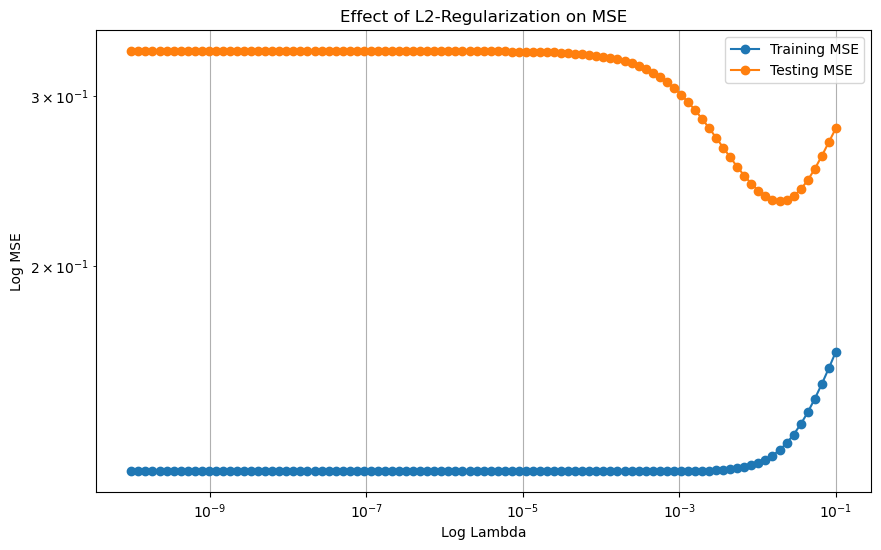

In [6]:
# plot results
plt.figure(figsize=(10, 6))
plt.plot(lambda_list, mean_train_mse, label='Training MSE', marker='o')
plt.plot(lambda_list, mean_test_mse, label='Testing MSE', marker='o')
plt.xlabel('Log Lambda')
plt.ylabel('Log MSE')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Effect of L2-Regularization on MSE')
plt.grid()
plt.show()

**Answer**

When $\lambda$ is samll know from the equation that L2 pennalty will be nominant by parameters $\boldsymbol{w}$ that make models flexible(high complexity) which also lead to overfitting.
With hihger $\lambda$, the MSE gaps between training and test are getting smaller, because $\lambda$ has high impact on L2 term. Hence, lead to small values of $\boldsymbol{w}$ and less flexible models (change on x has less effet on y). At the highest $\lambda$, we can clearly see that the performances of the model on both training and testing are poor, which clearly indicate the underfitting.